# This notebook aims to select datapoints from the pool of all TEs with lengths fitting the length distribution of all differential TEs
- <font color = red>TODO: write up a method part and result part for this session

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os

In [2]:
from matplotlib.patches import Patch

In [3]:
import sequence_comparison as seqComp

/home/lucy/anaconda3/envs/qc_pipe/lib/python3.8/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


## load data

### load TCPS dTE table

In [5]:
tcps_dTE_df = pd.read_csv("./genoLoc_TCPS_Deseq_indiv_locus_result.csv", header = 0, index_col= 0)

In [6]:
tcps_dTE_df.shape

(189, 11)

### load TCPS total TE table and extract all TEs

In [10]:
tcps_all_te = pd.read_csv("/home/lucy/Dropbox/TCPS_TE_results/TE_indi_deseq.tsv", header = 0, index_col=None, delimiter='\t' )

In [1]:
tcps_all_te.head()

NameError: name 'tcps_all_te' is not defined

In [9]:
tcps_all_te.shape

(204583, 6)

In [12]:
tcps_all_te = tcps_all_te[ ~tcps_all_te['TE name'].str.startswith( 'ENSG' ) ]
tcps_all_te.shape

(172873, 7)

In [19]:
tcps_all_te.head(2)

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,L2,0.097405,0.197787,1.457064,0.135744,0.892024,0.999991
1,AluSg,0.493240,1.038439,0.909837,1.141346,0.253726,0.999991


### load rmsk table and map genome location to the TE table

In [14]:
rmsk_df = pd.read_csv( "/home/lucy/Dropbox/TCPS_TE_results/hg38_gencode_rmsk_indi.csv", header = 0, index_col= 0 )
rmsk_df.shape

(5633664, 9)

In [16]:
rmsk_df.columns

Index(['genoName', 'source', 'feature', 'genoStart', 'genoEnd', 'score',
       'strand', 'frame', 'gene_id'],
      dtype='object')

In [ ]:
rmsk_df[rmsk_df['gene_id']].duplicated()

In [22]:
rmsk_df.shape

(5633664, 9)

In [23]:
len( rmsk_df['gene_id'].unique() )

5633664

In [25]:
rmsk_df.set_index( 'gene_id', inplace= True )

In [26]:
genome_loc_columns = ['genoName',  'genoStart', 'genoEnd','strand' ]

In [27]:
genome_loc_df = pd.DataFrame( index = tcps_all_te.index, columns= genome_loc_columns )

In [30]:
int( tcps_all_te.shape[0]/5 )

34574

In [31]:
for i in tcps_all_te.index[0:35000]:
    te_name = tcps_all_te.loc[i, 'TE name' ]
    genome_loc_df.loc[i] = rmsk_df.loc[ te_name, genome_loc_columns ]

In [32]:
incre = 35000
2*incre

70000

In [33]:
for i in tcps_all_te.index[35000:2*incre]:
    te_name = tcps_all_te.loc[i, 'TE name' ]
    genome_loc_df.loc[i] = rmsk_df.loc[ te_name, genome_loc_columns ]

In [34]:
for i in tcps_all_te.index[2*incre: 3*incre]:
    te_name = tcps_all_te.loc[i, 'TE name' ]
    genome_loc_df.loc[i] = rmsk_df.loc[ te_name, genome_loc_columns ]

In [35]:
for i in tcps_all_te.index[3*incre: 4*incre]:
    te_name = tcps_all_te.loc[i, 'TE name' ]
    genome_loc_df.loc[i] = rmsk_df.loc[ te_name, genome_loc_columns ]

In [37]:
tcps_all_te.shape[0] - 4*incre

32873

In [38]:
for i in tcps_all_te.index[4*incre::]:
    te_name = tcps_all_te.loc[i, 'TE name' ]
    genome_loc_df.loc[i] = rmsk_df.loc[ te_name, genome_loc_columns ]

In [39]:
genome_loc_df.head()

,genoName,genoStart,genoEnd,strand
0,chr1,92274206,92275925,+
1,chr1,150994813,150995102,+
2,chr1,176160334,176160805,+
3,chr1,243269607,243269808,-
4,chr1,1048489,1048789,+


In [40]:
genome_loc_df.shape

(172873, 4)

In [42]:
tcps_all_te2 = tcps_all_te.merge( genome_loc_df, left_index= True, right_index= True)

In [43]:
tcps_all_te2.head()

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genoName,genoStart,genoEnd,strand
0,L2,0.097405,0.197787,1.457064,0.135744,0.892024,0.999991,chr1,92274206,92275925,+
1,AluSg,0.493240,1.038439,0.909837,1.141346,0.253726,0.999991,chr1,150994813,150995102,+
2,L1PA8A,1.504698,-0.263127,0.834217,-0.315418,0.752444,0.999991,chr1,176160334,176160805,+
3,L1MDb,0.179092,0.166453,1.381934,0.120449,0.904127,0.999991,chr1,243269607,243269808,-
4,AluSp,0.033562,0.514654,3.312685,0.155358,0.876539,0.999991,chr1,1048489,1048789,+


## inspect the distributio between all TEs and dTEs

In [44]:
tcps_dTE_df.head()

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genoName,genoStart,genoEnd,strand
2361,MIRb_2591,21.977249,2.001854,0.495015,4.044027,0.000053,0.008073,chr1,21875471,21875616,-
2983,MIRb_3645,10.310570,2.238395,0.535974,4.176310,0.000030,0.005203,chr1,26188068,26188211,+
2992,LTR10A_6,7.215176,4.566861,1.173587,3.891371,0.000100,0.013165,chr1,26268832,26269405,+
3068,MIR_2537,1.101041,3.860287,1.037415,3.721063,0.000198,0.022386,chr1,26554369,26554498,+
3286,AluSp_907,2.735933,3.134858,0.762647,4.110499,0.000039,0.006472,chr1,27730174,27730485,-


In [47]:
dTE_seq_len = tcps_dTE_df['genoEnd'] - tcps_dTE_df['genoStart'] 

In [48]:
tcps_dTE_df['seqLen'] = dTE_seq_len

In [49]:
all_te_seq_len = tcps_all_te2['genoEnd'] - tcps_all_te2['genoStart']

In [50]:
tcps_all_te2['seqLen'] = all_te_seq_len

In [55]:
tcps_all_te2['seqLen'].astype(float).describe()

count    172873.000000
mean        474.620334
std         895.194167
min          22.000000
25%         181.000000
50%         294.000000
75%         338.000000
max      112801.000000
Name: seqLen, dtype: float64

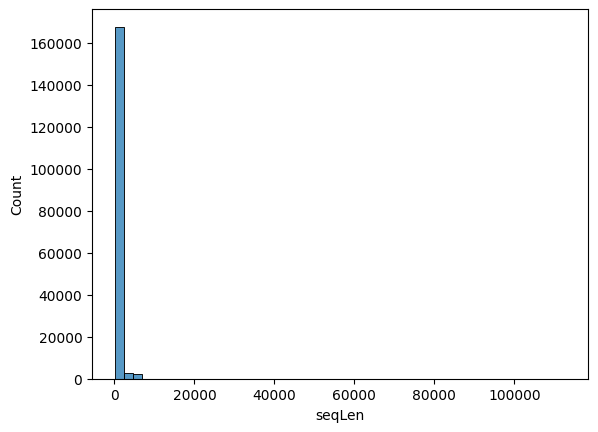

In [52]:
f,a = plt.subplots()
sn.histplot( tcps_all_te2['seqLen'], bins=50 , ax = a)
plt.show()

In [56]:
tcps_dTE_df['seqLen'].astype(float).describe()

count     189.000000
mean      428.439153
std       595.157804
min        29.000000
25%       133.000000
50%       270.000000
75%       438.000000
max      6031.000000
Name: seqLen, dtype: float64

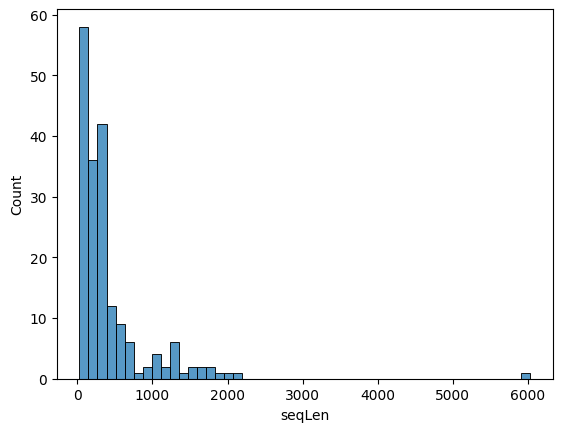

In [53]:
f,a = plt.subplots()
sn.histplot( tcps_dTE_df['seqLen'], bins=50 , ax = a)
plt.show()

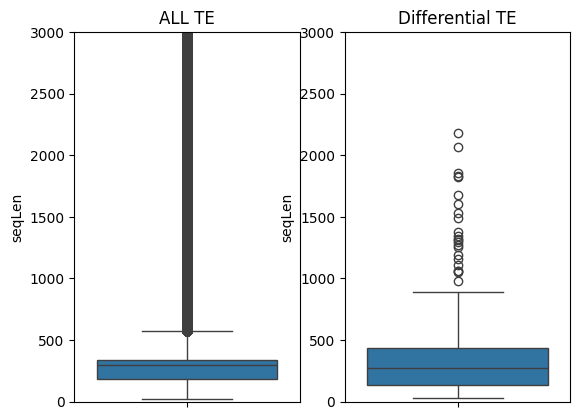

In [61]:
f,axes = plt.subplots( ncols=2, nrows = 1)
sn.boxplot( tcps_all_te2['seqLen'], ax = axes[0] )
axes[0].set_title("ALL TE")
sn.boxplot( tcps_dTE_df['seqLen'], ax = axes[1] )
axes[1].set_title("Differential TE")

axes[0].set_ylim([0, 3000] )
axes[1].set_ylim( [0,3000])
plt.show()

## re-sampling methods

### getting bins from target distribution -- drafting code

In [62]:
min( tcps_dTE_df['seqLen'])

29

In [66]:
tv =  tcps_dTE_df['seqLen'].sort_values(ascending= True,)
tv

9001        29
136290      49
105357      53
109912      58
36522       61
          ... 
47284     1827
124259    1855
26469     2069
14571     2177
84297     6031
Name: seqLen, Length: 189, dtype: int64

In [69]:
len( tv[ (tv>= 22) & (tv< 100) ] )

26

In [71]:
bin_counts= [ 1,3,5,7,9]
bin_prob = np.array( bin_counts) /  sum( bin_counts)

In [72]:
bin_prob

array([0.04, 0.12, 0.2 , 0.28, 0.36])

### getting bins from target distribution -- function

In [155]:
def get_target_distribution_bins( target_df, target_col_name, 
                                 smooth = True, smoothing_constant = 1e-3, binw_constant = 1 ):
    """ This function divides the target values ( target_df[ target_col_name ] ) into bins based on the values std.
    Then, it gives the probability of elements in each bin. The probability sums up to 1
    
    @param target_df, target_col_name: the dataframe and colname of the dataframe whose distribution wanted to be fit to.
    @param smooth: to make sure each bin has >0 probability, any bin that got 0 elements will receive a count of 0.001* total count of elements
    @param binw_constant: bin width constant, if set to 1, bin width will be 1 std of all data. Set to smaller fractions such as 0.5 to use finer bins
    @return bin_starts, bin_probs, bin_end: 
        bin_starts are the inclusive starting value of each bin. 
        bin_probs are the probability of elements falling into each bin given the current value vector s distribution
        bin_end is the largest value among the value, serving as the end point of the last bin"""
    
    # make sure it is numerical
    target_df[target_col_name] = target_df[target_col_name].astype(float)
    tvalues = target_df[target_col_name].sort_values( ascending = True ) # sorted for better count

    # get mean and std and other stats
    m1 = tvalues.mean()
    s1 = tvalues.std() # bin width will be int of s1
    binw = int(s1 * binw_constant) 
    total_element_counts = len( tvalues )

    # decide number of bins
    tmin = min( tvalues ) # target value min
    tmax = max( tvalues ) # target value max
    num_bins = int( (tmax - tmin)/binw )

    # get bin_starts and element counts in each bin
    
    bin_starts = []
    bin_element_counts = []
    
    b1 = tmin
    while( b1 <= tmax):
        bin_starts.append( b1 ) # record bin start
        b2 = b1+  binw # get bin end
        
        # count number of elements within the bin range
        num_bin_elements = len( tvalues[ (tvalues>= b1) & (tvalues < b2) ] )
        
        # if choose to smooth, make sure all bin has non zero counts
        if( smooth & (num_bin_elements < 1)):
            num_bin_elements = smoothing_constant * total_element_counts
        
        # update bin count 
        bin_element_counts.append( num_bin_elements )
        # update the b1 stride
        b1 = b2

    assert( len(bin_starts) == len( bin_element_counts) ), "ERROR: num bins and num of bin element count lists have different lenghts"

    bin_probs = np.array( bin_element_counts ) / sum(bin_element_counts)

    return bin_starts, bin_probs, tmax
    
        
        
    

### getting bins from target distribution -- testing

In [74]:
# test the function 
test_df1 = pd.DataFrame()
test_df1['v1'] = [ 1,3,5,7,9, 20, 40, 60, 80]

<Axes: >

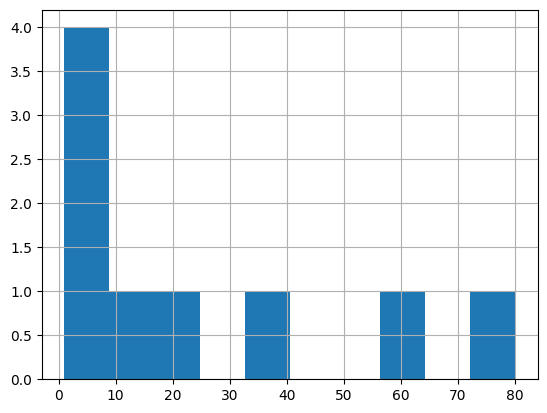

In [75]:
test_df1['v1'].hist()

In [78]:
tbin_start, tbin_probs = get_target_distribution_bins( test_df1, 'v1' )

In [79]:
tbin_start

[1.0, 29.0, 57.0]

In [80]:
tbin_probs

array([0.66666667, 0.11111111, 0.22222222])

#### Called the function on TE data here

In [158]:
dTE_bin_starts, dTE_bin_probs, dTE_bin_end = get_target_distribution_bins( tcps_dTE_df, 'seqLen' , binw_constant= 0.5)

In [159]:
len( dTE_bin_starts)

21

In [160]:
dTE_bin_probs

array([0.67967459, 0.14116318, 0.04182613, 0.03659786, 0.04182613,
       0.0156848 , 0.02091306, 0.00522827, 0.00098814, 0.00098814,
       0.00098814, 0.00098814, 0.00098814, 0.00098814, 0.00098814,
       0.00098814, 0.00098814, 0.00098814, 0.00098814, 0.00098814,
       0.00522827])

In [104]:
dTE_bin_starts

[29.0,
 624.0,
 1219.0,
 1814.0,
 2409.0,
 3004.0,
 3599.0,
 4194.0,
 4789.0,
 5384.0,
 5979.0]

In [105]:
dTE_bin_end

6031.0

### matching target bins to the pool dataset

In [107]:
tcps_all_te2.sort_values(by = 'seqLen', ascending= True, inplace = True)

In [109]:
tcps_all_te2['seqLen'].iloc[0]

22

In [152]:
def match_bins( target_bin_starts, target_bin_end,
               pool_df, pool_df_col_name, verbose = False ):
    """ This function divides the pool dataset into sub-sets based on bins derived from the target dataset. 
    This function will return a list of subset dfs divided from the pool df based on the target bins returned from get_target_distribution_bins().

    @param target_bin_starts, target_bin_end: target dataset bin boundaries where the target_bin_starts is a list of bin starting values, and target_bin_end is one single value ( the max value of the target dataset)
    @param: pool_df, pool_df_col_name: the pool dataframe to be re-sampled.The column selected should be the same value types (eg. sequence length data) with the target df's selected column 
    @param: verbose: mainly used for debugging. Ff True, print the bins boundaries
    
    @return sub_df_ls, smooth_pool_start, smooth_pool_end """

    # variable declare
    ret_df_ls = [] # list to hold the pool df subsets
    smooth_pool_start = False # set True when pool starts with smaller elements than 1st bin start
    smooth_pool_end = False # set True if pool ends with larger elements than bin ends

    pool_df.sort_values( by = pool_df_col_name, ascending= True, inplace = True)
    povalues = pool_df[pool_df_col_name ] # pool dataset values
    
    ps = povalues.iloc[0] # pool data starting point 
    pmax = max( povalues )
    
    bi = 0 # index in the target bin start list
    bs = target_bin_starts[bi] # the first bin start value

    # checking if the pool has a smaller starting value than the target dataset
    if( ps < bs):
        # append subdf that is between p-start and bin-start as a 'smooth start' 
        #( sample from this portion with very low probability)
        subdf_smooth_start = pool_df[pool_df[pool_df_col_name] < bs ]
        smooth_pool_start = True
        print( 'smooth start set True' )
        
        ret_df_ls.append( subdf_smooth_start )
        
        #df_range = (subdf_smooth_start[pool_df_col_name].iloc[0], subdf_smooth_start[pool_df_col_name].iloc[-1] )
        #print( f"'>>>>>DEBUG: Appended subdf that ranging {df_range} ")
        
        bi +=1
        #bs = target_bin_starts[bi ] 
        #ps = bs

    #print( f'>>>>> DEBUG: before the while loop, bi = {bi}, ps = {ps}, bs = {bs}')
    target_bin_starts = target_bin_starts + [target_bin_end ] # add the bin end to the list 
    
    while( ( ps < target_bin_end) & (ps < pmax) ):
        
        bs = target_bin_starts[bi ] 

        if( verbose):
            print( f'>>>>> DEBUG: in the the while loop after variable updates, bi = {bi}, ps = {ps}, bs = {bs}')
        
        if( ps < bs):
            subdf = pool_df[ (pool_df[pool_df_col_name] >= ps) & (pool_df[pool_df_col_name] < bs) ]
            if( subdf.shape[0] == 0 ):
                subdf = None
            else:
                df_range = (subdf[pool_df_col_name].iloc[0], subdf[pool_df_col_name].iloc[-1] )
                #print( f"'>>>>>DEBUG: Appended subdf that ranging {df_range} ")
                
            ret_df_ls.append( subdf)
        else:
            ret_df_ls.append( None)

        # increment bin ticks
        ps = bs
        bi +=1


    if( target_bin_end < pmax ):
        smooth_pool_end = True
        print( 'smooth end set True' )
        subdf_smooth_end = pool_df[pool_df[pool_df_col_name] >= target_bin_end ]
        ret_df_ls.append( subdf_smooth_end )


    target_bin_starts = target_bin_starts[0:-1] # remove the bin ends from here 
    assert( len(ret_df_ls) == ( int(smooth_pool_start) + int( smooth_pool_end) + len( target_bin_starts) ) ), f"Target and pool bins not same length: target has {len( target_bin_starts)} bins, but returned df has { len(ret_df_ls)} bins including {int(smooth_pool_start) } starting bin and {int( smooth_pool_end)} ending bin "

    return ret_df_ls, smooth_pool_start, smooth_pool_end
        
            


    

    
    
    
    

### matching target bins: calling with the TE data

In [161]:
dTE_bin_starts

[29.0,
 326.0,
 623.0,
 920.0,
 1217.0,
 1514.0,
 1811.0,
 2108.0,
 2405.0,
 2702.0,
 2999.0,
 3296.0,
 3593.0,
 3890.0,
 4187.0,
 4484.0,
 4781.0,
 5078.0,
 5375.0,
 5672.0,
 5969.0]

In [162]:
ret_df_ls, smooth_pool_start, smooth_pool_end = match_bins( target_bin_starts = dTE_bin_starts , target_bin_end = dTE_bin_end,
               pool_df = tcps_all_te2, pool_df_col_name = 'seqLen' )

smooth start set True
>>>>> DEBUG: in the the while loop after variable updates, bi = 1, ps = 22, bs = 326.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 2, ps = 326.0, bs = 623.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 3, ps = 623.0, bs = 920.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 4, ps = 920.0, bs = 1217.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 5, ps = 1217.0, bs = 1514.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 6, ps = 1514.0, bs = 1811.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 7, ps = 1811.0, bs = 2108.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 8, ps = 2108.0, bs = 2405.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 9, ps = 2405.0, bs = 2702.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 10, ps = 2702.0, bs = 2999.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 11,

In [163]:
for d in ret_df_ls:
    if( not d is None ):
        print( d.shape )
    else:
        print( 0 )

(24, 12)
(127677, 12)
(22981, 12)
(6555, 12)
(3785, 12)
(2619, 12)
(2371, 12)
(1107, 12)
(788, 12)
(555, 12)
(523, 12)
(389, 12)
(294, 12)
(251, 12)
(222, 12)
(192, 12)
(153, 12)
(150, 12)
(142, 12)
(196, 12)
(133, 12)
(488, 12)
(1302, 12)


### Re-sampling each bin based on target distribution

In [165]:
a1 = [0 for i in range(5) ]
a1

[0, 0, 0, 0, 0]

In [166]:
a1[2] = 5
a1

[0, 0, 5, 0, 0]

In [178]:
a1 = [ 1e-3 ] + a1
a1

[0.001, 0, 0, 5, 0, 0]

In [260]:

def re_sample_pool_df( ret_df_ls, smooth_pool_start, smooth_pool_end, target_bin_probs, 
                      smoothing_constant = 1e-3, shrinking_constant = 0.8, verbose = False):
    """This function re-sample the pool dataset to return a new df that approximately fix the target dataset distribtion
    @param ret_df_ls: the list of dataframes composing the pool dataset but divided based on the target df bins
    @param smooth_pool_start, smooth_pool_end: booleans indicating whether the pool datasets has wider spread than the target datasets that 
        needs small probability bins in front or behind the bins dervied from the target
    @param target_bin_probs: a list of probabilities for each bin's representation in the target dataset
    @param smoothing_constant: a constant ( very small value used to add as probability as the smooth starting or ending bins for the pool dataset if needed
    @param shrinking_constant: a constant used to scale down the number of elements sampled from the highest probability bin in the pool dataset.
        Eg. if the highest probability bin has 10k elements, the re-sampled df should have 10k*shrinking_constant elements in the bin 
    @param verbose: print the lists of pre-adjusted probability distribution by bin, target probability and post-adjusted sample size
    
    @return: a re-sampled pool dataset that has distribution resembling the target dataset"""

    # check and add smooth start or end if needed
    pool_bin_probs = list( target_bin_probs )
    if( smooth_pool_start):
        pool_bin_probs = [ smoothing_constant] + pool_bin_probs
        print( len(pool_bin_probs ) )

    if( smooth_pool_end):
        pool_bin_probs = pool_bin_probs + [ smoothing_constant ]


    err1 = (f"ERROR: Sub-df list's dimension not matching the number of bins in the probability list:\n" +
           f"len Sub-df list == {len( ret_df_ls)}\n" + f"len probability list == {len( pool_bin_probs)}" )
    assert( len(pool_bin_probs ) == len( ret_df_ls) ), err1
          
    
    # Here, decide number of elements in each bin in the pool dataset
    
    # find the median probability from the target prob
    med_bin_ind  = np.argsort(pool_bin_probs)[ len(pool_bin_probs)//2 ]
    # number of elements in the median prob bin
    med_bin_sample_size = ret_df_ls[ med_bin_ind ].shape[0] 

    # find the number of samples should be in each bin in the pool dataset
    target_sample_size_ls = [ 0 for i in range( len( pool_bin_probs))] # number of elements that should be in each bin, initiate as 0s
    
    # adjusted median bin element size
    # then used this median sample size as the ceiling to scale other bin's sample size 
    target_ceiling = shrinking_constant*med_bin_sample_size 
    target_sample_size_ls[med_bin_ind ] = int( target_ceiling )
    
    for i in range( len( pool_bin_probs)):
        if( i == med_bin_ind):
            continue
        
        # calculate probability ratio between the current bin and the med bin
        prob_r = pool_bin_probs[i] / pool_bin_probs[med_bin_ind] 
        curr_bin_target_sample_size = target_ceiling * prob_r

        # update the probability list 
        target_sample_size_ls[i] = int( curr_bin_target_sample_size )

    
    actual_pool_bin_prob = [ ( 0 if d is None else d.shape[0]) for d in ret_df_ls ]
    actual_pool_bin_prob = np.array( actual_pool_bin_prob) / sum( actual_pool_bin_prob) 

    if( verbose):
        print(f"||||| Testting: Pre-adjustment probability list for the pool data is \n{list( actual_pool_bin_prob )}")
        print(f"||||| Testting: Target probability list for the pool data is \n{pool_bin_probs}")
        print(f"||||| Testting: Post-adjustment sample size list for the pool data is {target_sample_size_ls}")


    # draw samples based on the number of elements
    assert( len(target_sample_size_ls ) == len( ret_df_ls) ), "ERROR: Sub-df list's dimension not matching the number of bins in the element size list"

    resampled_subdf_ls = []
    for j in range(len( target_sample_size_ls)):
        if( ret_df_ls[j] is None ):
            resampled_subdf_ls.append( None )
            continue 
        
        subdf_size = ret_df_ls[j].shape[0]
        subdf2 = ret_df_ls[j].sample( n = min(subdf_size, target_sample_size_ls[j]) )
        resampled_subdf_ls.append( subdf2 )
        
        
    # row combine the subdfs 
    resampled_df = pd.concat( resampled_subdf_ls, axis = 0, ignore_index= False )

    return resampled_df

    
    
    

### Re-sampling: testing

In [196]:
smooth_pool_start

True

In [197]:
smooth_pool_end

True

In [198]:
test_dTE_probs = dTE_bin_probs
test_dTE_probs

array([0.67967459, 0.14116318, 0.04182613, 0.03659786, 0.04182613,
       0.0156848 , 0.02091306, 0.00522827, 0.00098814, 0.00098814,
       0.00098814, 0.00098814, 0.00098814, 0.00098814, 0.00098814,
       0.00098814, 0.00098814, 0.00098814, 0.00098814, 0.00098814,
       0.00522827])

In [190]:
[1e-3] + test_dTE_probs

array([0.68067459, 0.14216318, 0.04282613, 0.03759786, 0.04282613,
       0.0166848 , 0.02191306, 0.00622827, 0.00198814, 0.00198814,
       0.00198814, 0.00198814, 0.00198814, 0.00198814, 0.00198814,
       0.00198814, 0.00198814, 0.00198814, 0.00198814, 0.00198814,
       0.00622827])

#### Called the function on all TE df

In [261]:
resampled_df = re_sample_pool_df( ret_df_ls, smooth_pool_start, smooth_pool_end, dTE_bin_probs ) 

22
||||| Testting: Pre-adjustment probability list for the pool data is 
[0.00013881096838001816, 0.7384570004106491, 0.13291728601421657, 0.03791274573879246, 0.0218916464715987, 0.015147746924469482, 0.01371336691787596, 0.006402655916528338, 0.004557626795143929, 0.00321000364378792, 0.0030249223526145623, 0.002249894445826128, 0.0017004343626552225, 0.0014517313776410232, 0.001284001457515168, 0.0011104877470401453, 0.0008849199234226158, 0.0008675685523751135, 0.0008212982295817741, 0.001133622908436815, 0.0007692441164392673, 0.002822489690393703, 0.007530495034615985]
||||| Testting: Target probability list for the pool data is 
[0.001, 0.6796745927180713, 0.14116318464144556, 0.04182612878265054, 0.036597862684819224, 0.04182612878265054, 0.01568479829349395, 0.02091306439132527, 0.005228266097831317, 0.000988142292490119, 0.000988142292490119, 0.000988142292490119, 0.000988142292490119, 0.000988142292490119, 0.000988142292490119, 0.000988142292490119, 0.000988142292490119, 0.0

In [207]:
resampled_df.shape

(170996, 12)

In [208]:
tcps_all_te2.shape

(172873, 12)

## Visualize distributions ( pre- and post- adjustment )

In [164]:
# plot: target seqLen histplot with num of bins matcing the one used in the re-draw process
# original pool data seqLen histplot
# resampled pool data seqLen histplot
# show all on the same x-range based on the target's x-range

In [268]:
# the numbers are copied from the testing stdout
pre_adjusted_prob = [0.00013881096838001816, 0.7384570004106491, 0.13291728601421657, 0.03791274573879246, 0.0218916464715987, 0.015147746924469482, 0.01371336691787596, 0.006402655916528338, 0.004557626795143929, 0.00321000364378792, 0.0030249223526145623, 0.002249894445826128, 0.0017004343626552225, 0.0014517313776410232, 0.001284001457515168, 0.0011104877470401453, 0.0008849199234226158, 0.0008675685523751135, 0.0008212982295817741, 0.001133622908436815, 0.0007692441164392673, 0.002822489690393703, 0.007530495034615985]
adjusted_prob = [0.001, 0.6796745927180713, 0.14116318464144556, 0.04182612878265054, 0.036597862684819224, 0.04182612878265054, 0.01568479829349395, 0.02091306439132527, 0.005228266097831317, 0.000988142292490119, 0.000988142292490119, 0.000988142292490119, 0.000988142292490119, 0.000988142292490119, 0.000988142292490119, 0.000988142292490119, 0.000988142292490119, 0.000988142292490119, 0.000988142292490119, 0.000988142292490119, 0.000988142292490119, 0.005228266097831317, 0.001]
adjusted_size = [238, 161777, 33600, 9955, 8711, 9955, 3733, 4977, 1244, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 235, 1244, 238]

Text(0, 0.5, 'Post-adjusted sample probability by bin')

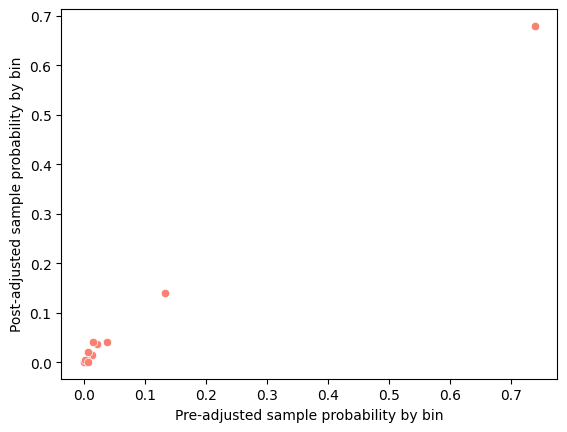

In [269]:
sn.scatterplot( x = pre_adjusted_prob, y = adjusted_prob, color = 'salmon')
plt.xlabel( 'Pre-adjusted sample probability by bin')
plt.ylabel( 'Post-adjusted sample probability by bin')

quick visaulization of the new bins

In [213]:
len( dTE_bin_starts )

21

### compare pre- and post- adjustment probability distribution

In [215]:
pool_start = min( tcps_all_te2['seqLen'] )
pool_end = max( tcps_all_te2['seqLen'] )

In [217]:
bin_x_ticks = [pool_start ] + dTE_bin_starts + [dTE_bin_end]
len( bin_x_ticks )

23

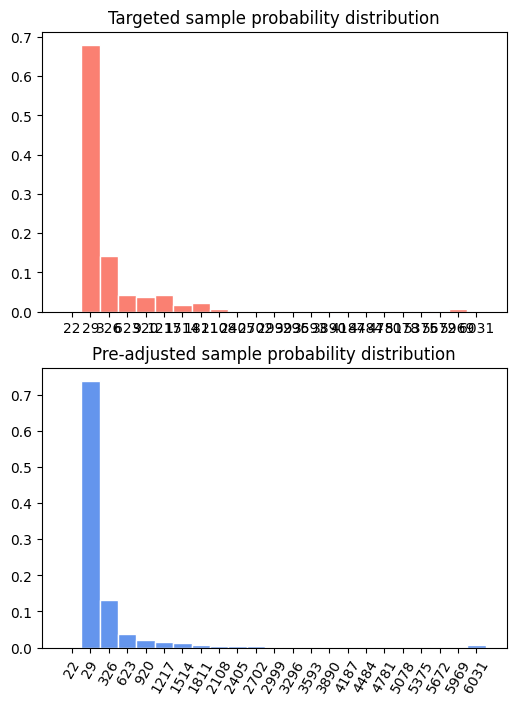

In [271]:
bin_x_ticks = [ f"{int(b):d}" for b in bin_x_ticks ]
f,a = plt.subplots(nrows=2, ncols=1, figsize = [6,8])
a[0].bar(bin_x_ticks, height = adjusted_prob, width= 1, color = 'salmon', edgecolor = 'white' )
a[0].set_title( 'Targeted sample probability distribution')
a[0].set_xticks( ticks = a[0].get_xticks() , labels = None) #["" for i in range( len( bin_x_ticks))] )

a[1].bar(bin_x_ticks, height = pre_adjusted_prob, width= 1, color = 'cornflowerblue', edgecolor = 'white' )
a[1].set_title( 'Pre-adjusted sample probability distribution')
t = plt.xticks( rotation=60, ha='center')

plt.show()

In [244]:
len( bin_x_ticks )

23

In [310]:
cp = sn.color_palette("colorblind")
cp

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

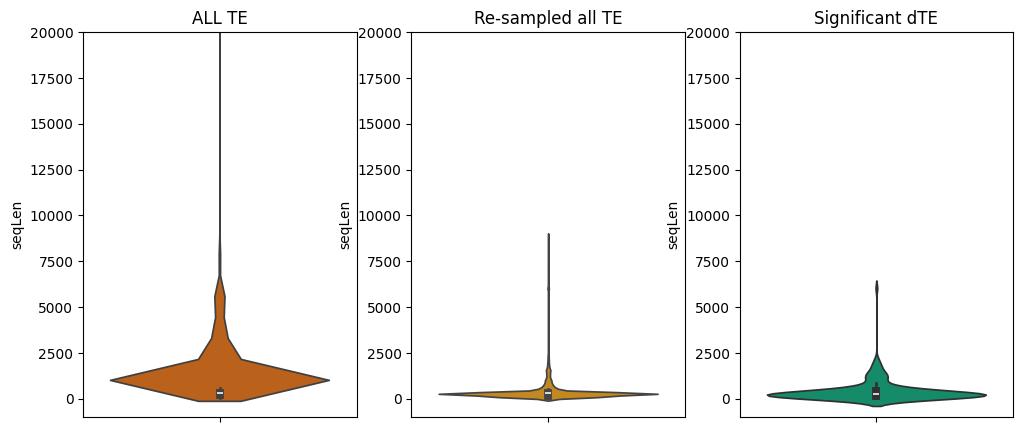

In [316]:
f,axes = plt.subplots( ncols=3, nrows = 1, figsize = [12,5])
sn.violinplot( tcps_all_te2['seqLen'], ax = axes[0], color = cp[3] )
axes[0].set_title("ALL TE")

sn.violinplot( resampled_df['seqLen'], ax = axes[1], color = cp[1] )
axes[1].set_title("Re-sampled all TE")

sn.violinplot( tcps_dTE_df['seqLen'], ax = axes[2], color = cp[2] )
axes[2].set_title("Significant dTE")


axes[0].set_ylim([-1000, 20000] )
axes[1].set_ylim( [-1000,20000])
axes[2].set_ylim( [-1000,20000])

plt.show()

### check sample size distribution 

In [243]:
short_tcps_seq_len = tcps_all_te2['seqLen'][tcps_all_te2['seqLen'] < 6031]

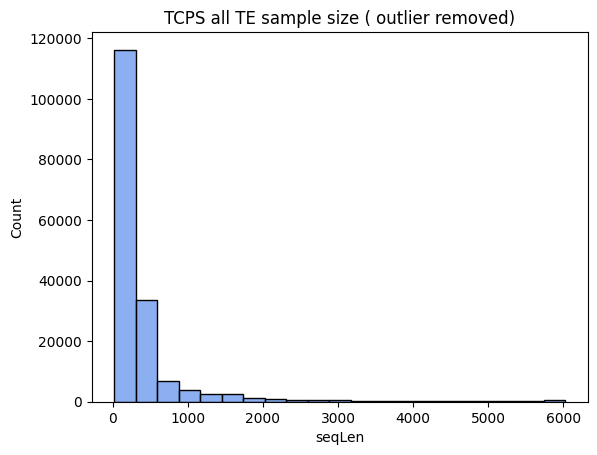

In [273]:
f,a = plt.subplots()
sn.histplot( short_tcps_seq_len, bins=21 , ax = a, color = 'cornflowerblue')
#a.set_xlim( [0, 6031] )
a.set_title( "TCPS all TE sample size ( outlier removed)")
plt.show()

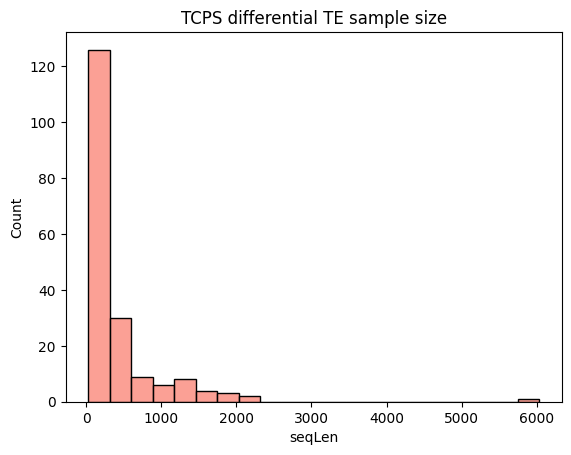

In [275]:
f,a = plt.subplots()
sn.histplot( tcps_dTE_df['seqLen'], bins=21 , ax = a, color = 'salmon' )
#a.set_xlim( [0, 6031] ),
a.set_title( "TCPS differential TE sample size")
plt.show()

In [250]:
tcps_dTE_df['absolute_LFC'] = [ abs( lfc) for lfc in tcps_dTE_df['log2FoldChange'] ]

In [251]:
tcps_high_lfc_dTE = tcps_dTE_df.sort_values( by = 'absolute_LFC', ascending= False )

### LFC vs seqLen visualization

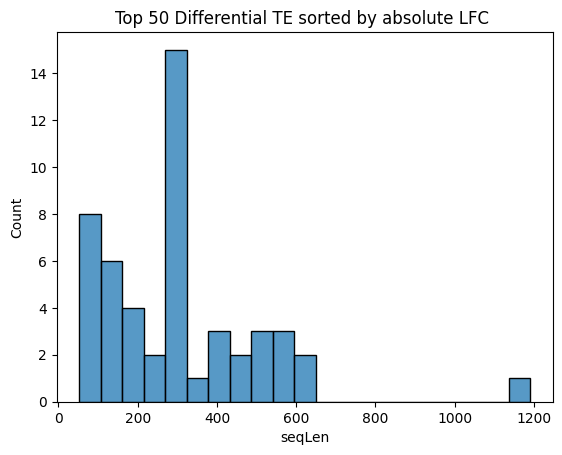

In [276]:
f,a = plt.subplots()
sn.histplot( tcps_high_lfc_dTE['seqLen'].iloc[0:50], bins=21 , ax = a)
a.set_title( "Top 50 Differential TE sorted by absolute LFC ")
#a.set_xlim( [0, 6031] )
plt.show()

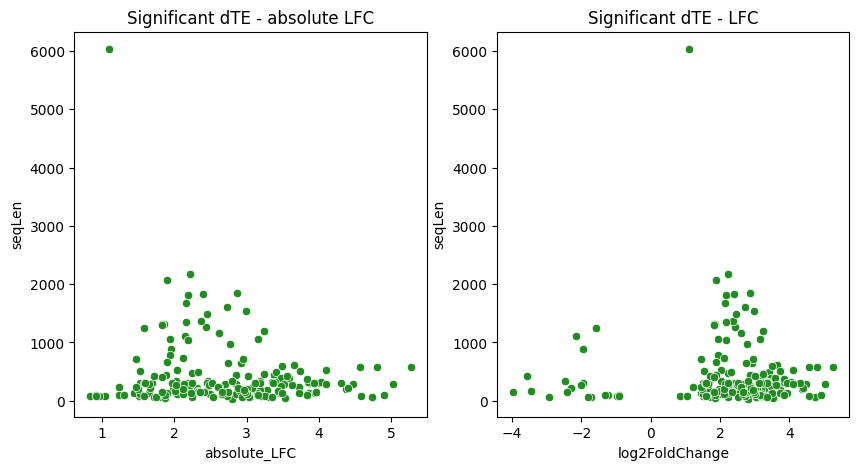

In [284]:
f,a = plt.subplots( nrows = 1, ncols= 2, figsize= [10, 5 ] )
sn.scatterplot( data = tcps_dTE_df, y = 'seqLen' , x = 'absolute_LFC', color = 'forestgreen', ax = a[0] )
a[0].set_title( 'Significant dTE - absolute LFC')

sn.scatterplot( data = tcps_dTE_df, y = 'seqLen' , x = 'log2FoldChange', color = 'forestgreen', ax = a[1] )
a[1].set_title( 'Significant dTE - LFC')

plt.show()

In [283]:
tcps_all_te2.head()

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genoName,genoStart,genoEnd,strand,seqLen
166553,Alu_4200,0.228317,0.402569,1.563272,0.257517,0.796780,0.999991,chr20,49158505,49158527,+,22
133439,MIR1_Amn_9014,0.594186,-1.274058,1.028602,-1.238630,0.215482,0.999991,chr15,75639564,75639587,+,23
156965,MIRb_204437,0.804711,-0.309917,1.389233,-0.223085,0.823469,0.999991,chr19,13799682,13799706,-,24
100591,L2c_90080,2.784909,3.665215,1.451265,2.525531,0.011552,0.455554,chr10,104039148,104039173,+,25
126084,L2c_113491,0.034266,0.511230,3.833625,0.133354,0.893913,0.999991,chr14,68067960,68067985,-,25


In [285]:
all_te_abs_lfc = [ abs(l) for l in tcps_all_te2['log2FoldChange'] ] 
tcps_all_te2[ 'absolute_LFC'] = all_te_abs_lfc

In [289]:
rm_out_all_te = tcps_all_te2[tcps_all_te2['seqLen'] < 10000]

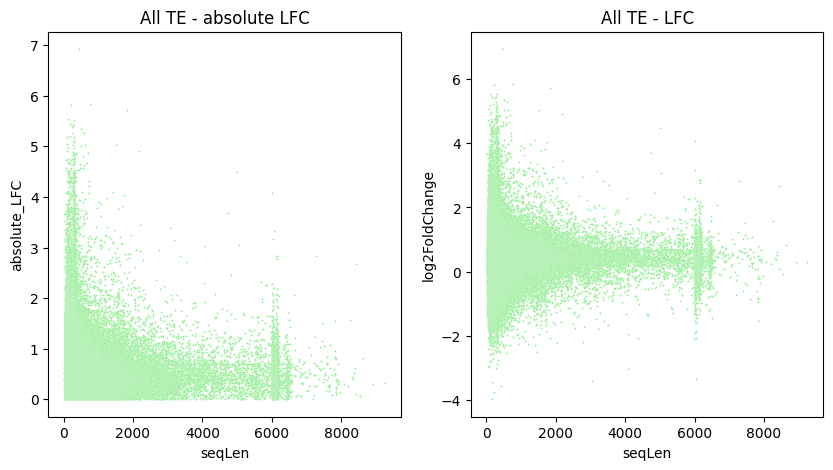

In [295]:
f,a = plt.subplots( nrows = 1, ncols= 2, figsize= [10, 5 ] )
sn.scatterplot( data = rm_out_all_te, x = 'seqLen' , y = 'absolute_LFC', color = 'lightgreen', ax = a[0], s = 2 )
a[0].set_title( 'All TE - absolute LFC')

sn.scatterplot( data = rm_out_all_te, x = 'seqLen' , y = 'log2FoldChange', color = 'lightgreen', ax = a[1] , s= 2 )
a[1].set_title( 'All TE - LFC')

plt.show()

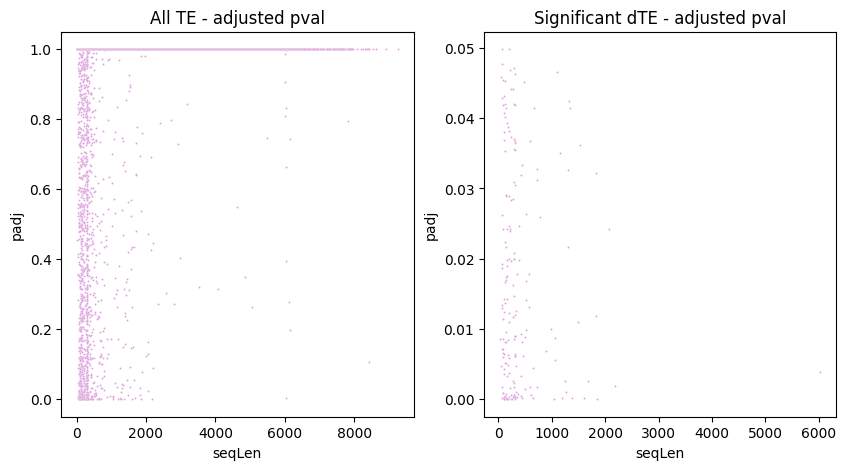

In [296]:
f,a = plt.subplots( nrows = 1, ncols= 2, figsize= [10, 5 ] )
sn.scatterplot( data = rm_out_all_te, x = 'seqLen' , y = 'padj', color = 'plum', ax = a[0], s = 2 )
a[0].set_title( 'All TE - adjusted pval')

sn.scatterplot( data = tcps_dTE_df, x = 'seqLen' , y = 'padj', color = 'plum', ax = a[1] , s= 2 )
a[1].set_title( 'Significant dTE - adjusted pval')

plt.show()

## Re-sample with finer bins
- try binw = 0.2 std

In [318]:
dTE_bs2, dTE_bp2, dTE_be2 = get_target_distribution_bins( tcps_dTE_df, 'seqLen' , binw_constant= 0.2)

ret_df_ls2, smooth_s2, smooth_e2 = match_bins( target_bin_starts = dTE_bs2 , target_bin_end = dTE_be2,
               pool_df = tcps_all_te2, pool_df_col_name = 'seqLen' )

smooth start set True
>>>>> DEBUG: in the the while loop after variable updates, bi = 1, ps = 22, bs = 148.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 2, ps = 148.0, bs = 267.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 3, ps = 267.0, bs = 386.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 4, ps = 386.0, bs = 505.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 5, ps = 505.0, bs = 624.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 6, ps = 624.0, bs = 743.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 7, ps = 743.0, bs = 862.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 8, ps = 862.0, bs = 981.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 9, ps = 981.0, bs = 1100.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 10, ps = 1100.0, bs = 1219.0
>>>>> DEBUG: in the the while loop after variable updates, bi = 11, ps = 1219

In [319]:
bw2_resampled_df = re_sample_pool_df( ret_df_ls2, smooth_s2, smooth_e2, dTE_bp2 ) 

52
||||| Testting: Pre-adjustment probability list for the pool data is 
[0.00013881096838001816, 0.18286031567927727, 0.19193508273712095, 0.4151836064246343, 0.05245897846694853, 0.029109816827359643, 0.01858331839187493, 0.01386952925730348, 0.011081742309004784, 0.01012163311104299, 0.006153952931514138, 0.005928385107896609, 0.006125033979768301, 0.007414819227632637, 0.005587141477295731, 0.0036784906620704813, 0.00300757098156706, 0.0024638946887453224, 0.0020416779932561006, 0.0017235695240518923, 0.0017004343626552225, 0.0014922179100851952, 0.0012261635540234937, 0.0009369740365651226, 0.0013071366189118378, 0.0012897852478643355, 0.00094275782691429, 0.0009543254076126249, 0.0007287575839950954, 0.0007461089550425976, 0.0005494600831709053, 0.0005031897603775658, 0.0006188655673609143, 0.0006535683094559189, 0.0005552438735200727, 0.00041064911479088705, 0.00042221669548922193, 0.0005205411314250681, 0.0003238922595533757, 0.0003875139533942174, 0.00032967604990254314, 0.000

In [322]:
pre_adj_prob2 = [0.00013881096838001816, 0.18286031567927727, 0.19193508273712095, 0.4151836064246343, 0.05245897846694853, 0.029109816827359643, 0.01858331839187493, 0.01386952925730348, 0.011081742309004784, 0.01012163311104299, 0.006153952931514138, 0.005928385107896609, 0.006125033979768301, 0.007414819227632637, 0.005587141477295731, 0.0036784906620704813, 0.00300757098156706, 0.0024638946887453224, 0.0020416779932561006, 0.0017235695240518923, 0.0017004343626552225, 0.0014922179100851952, 0.0012261635540234937, 0.0009369740365651226, 0.0013071366189118378, 0.0012897852478643355, 0.00094275782691429, 0.0009543254076126249, 0.0007287575839950954, 0.0007461089550425976, 0.0005494600831709053, 0.0005031897603775658, 0.0006188655673609143, 0.0006535683094559189, 0.0005552438735200727, 0.00041064911479088705, 0.00042221669548922193, 0.0005205411314250681, 0.0003238922595533757, 0.0003875139533942174, 0.00032967604990254314, 0.0003065408885058734, 0.0003759463726958825, 0.0003759463726958825, 0.0003470274209500454, 0.00028918951745837115, 0.0003990815340925522, 0.0005552438735200727, 0.0003470274209500454, 0.0003181084692042083, 0.00031232467885504087, 0.0027762193676003633, 0.007530495034615985]
post_adj_prob2 = [0.001, 0.29707483724908734, 0.17926929833996652, 0.22024513796053027, 0.06146375943084566, 0.04609781957313425, 0.03073187971542283, 0.005121979952570472, 0.010243959905140943, 0.015365939857711414, 0.015365939857711414, 0.02560989976285236, 0.010243959905140943, 0.010243959905140943, 0.010243959905140943, 0.0009680542110358191, 0.015365939857711414, 0.0009680542110358191, 0.005121979952570472, 0.005121979952570472, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.0009680542110358191, 0.005121979952570472, 0.001]

In [330]:
bin_x_ticks2 = [ min( tcps_all_te2['seqLen'] ) ] + dTE_bs2 + [dTE_be2] + [dTE_be2 + (dTE_bs2[-1] - dTE_bs2[-2])]
print( len( bin_x_ticks2 ) )
#bin_x_ticks2 = [ f"{int(b):d}" for b in bin_x_ticks2 ]

54


In [323]:
len(pre_adj_prob2)

53

In [326]:
prob_comp_df = pd.DataFrame(  )
prob_comp_df['post_adj'] = post_adj_prob2
prob_comp_df['pre_adj'] = pre_adj_prob2
prob_comp_df['bins'] = bin_x_ticks2

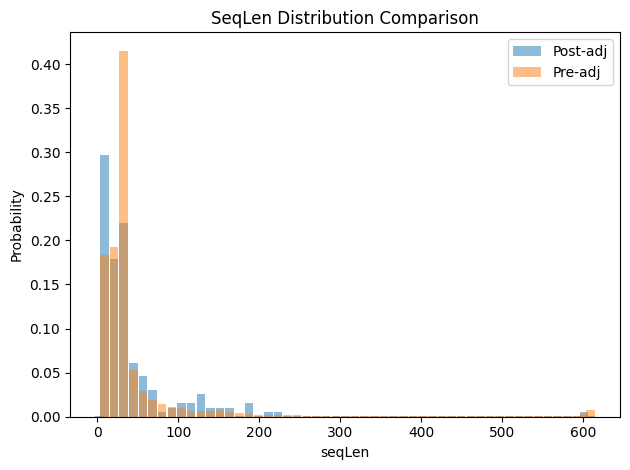

In [346]:
# Example data
bins = bin_x_ticks2  # bin edges
heights1 = post_adj_prob2  # dataset 1
heights2 = pre_adj_prob2  # dataset 2

# Calculate bin centers
bin_centers =  0.05* (np.array(bins[:-1]) + np.array(bins[1:]))
bar_width = (bins[1] - bins[0])*1.5 # Adjust width for side-by-side

# Plot side-by-side histograms
plt.bar(bin_centers , heights1, width=bar_width, label='Post-adj', alpha=0.5)
plt.bar(bin_centers , heights2, width=bar_width, label='Pre-adj', alpha=0.5)

# Add labels and legend
plt.xlabel('seqLen')
plt.ylabel('Probability')
plt.title('SeqLen Distribution Comparison')
plt.legend()
plt.tight_layout()
plt.show()


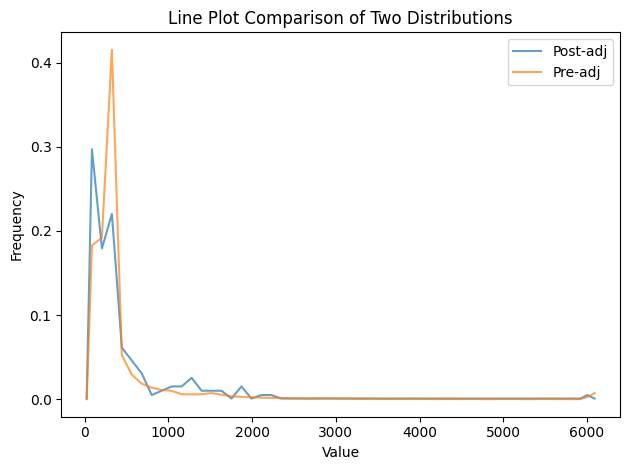

In [343]:
bin_centers = 0.5 * (np.array(bins[:-1]) + np.array(bins[1:]))

# Line plot
plt.plot(bin_centers, heights1, marker=None, linestyle='-', label='Post-adj', alpha = 0.7)
plt.plot(bin_centers, heights2, marker=None, linestyle='-', label='Pre-adj', alpha = 0.7)

# Labels and legend
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Line Plot Comparison of Two Distributions')
plt.legend()
plt.tight_layout()
plt.show()

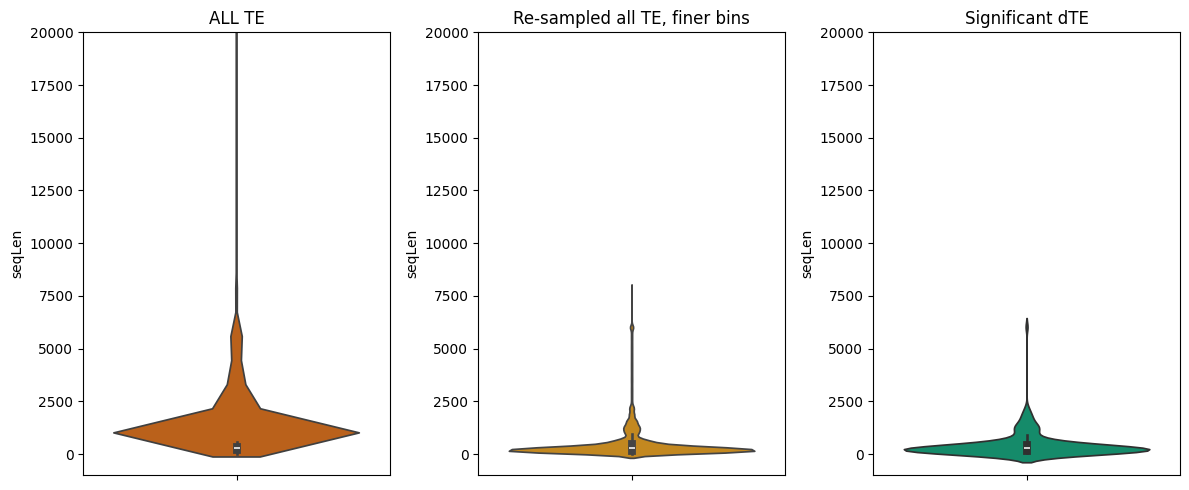

In [377]:
f,axes = plt.subplots( ncols=3, nrows = 1, figsize = [12,5])
sn.violinplot( tcps_all_te2['seqLen'], ax = axes[0], color = cp[3] )
axes[0].set_title("ALL TE")

sn.violinplot( bw2_resampled_df['seqLen'], ax = axes[1], color = cp[1] )
axes[1].set_title("Re-sampled all TE, finer bins")

sn.violinplot( tcps_dTE_df['seqLen'], ax = axes[2], color = cp[2] )
axes[2].set_title("Significant dTE")


axes[0].set_ylim([-1000, 20000] )
axes[1].set_ylim( [-1000,20000])
axes[2].set_ylim( [-1000,20000])

plt.tight_layout()
plt.show()

## save data

In [352]:
logi = pd.read_csv("./OUTPUT_EXPLAIN.csv", header = 0, index_col = 0 )
logi.columns

Index(['count_table_indiv.csv', 'count_table_subF.csv', 'mm39_rmsk_full.tsv',
       'Deseq_indiv_locus_results.csv', 'genoLoc_Deseq_indiv_locus_result.csv',
       'compare_dTE_overlap/', 'genoLoc_TCPS_Deseq_indiv_locus_result.csv'],
      dtype='object')

In [ ]:
#tcps_all_te2 # TCPS TE indiv with genome location information
# tcps_dTE_df # TCPS sig dTE with upated genome location information
#bw2_resampled_df # the re-sampled all TE 

In [374]:
#bw2_resampled_df.shape 

In [349]:
tcps_dTE_df0 = pd.read_csv("./genoLoc_TCPS_Deseq_indiv_locus_result.csv", header = 0, index_col= 0)

In [350]:
tcps_dTE_df0.shape

(189, 11)

In [351]:
tcps_dTE_df.shape # check if the df shape still match

(189, 13)

In [355]:
tcps_dTE_df.head()

,TE name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,genoName,genoStart,genoEnd,strand,seqLen,absolute_LFC
2361,MIRb_2591,21.977249,2.001854,0.495015,4.044027,0.000053,0.008073,chr1,21875471,21875616,-,145.0,2.001854
2983,MIRb_3645,10.310570,2.238395,0.535974,4.176310,0.000030,0.005203,chr1,26188068,26188211,+,143.0,2.238395
2992,LTR10A_6,7.215176,4.566861,1.173587,3.891371,0.000100,0.013165,chr1,26268832,26269405,+,573.0,4.566861
3068,MIR_2537,1.101041,3.860287,1.037415,3.721063,0.000198,0.022386,chr1,26554369,26554498,+,129.0,3.860287
3286,AluSp_907,2.735933,3.134858,0.762647,4.110499,0.000039,0.006472,chr1,27730174,27730485,-,311.0,3.134858


In [353]:
tcps_dTE_df.to_csv("./genoLoc_TCPS_Deseq_indiv_locus_result.csv", header = True, index = True )

In [356]:
logi['genoLoc_TCPS_Deseq_indiv_locus_result.csv'].loc['explain'] = logi['genoLoc_TCPS_Deseq_indiv_locus_result.csv'].loc['explain'] + '. Updated in nb6 to include sequence length information'

In [369]:
logi['genoLoc_TCPS_Deseq_indiv_locus_result.csv'].loc['nb_updated'] = 6

In [358]:
#logi['genoLoc_TCPS_Deseq_indiv_locus_result.csv'].loc['explain']

In [360]:
tcps_all_te0 = pd.read_csv("/home/lucy/Dropbox/TCPS_TE_results/TE_indi_deseq.tsv", header = 0, index_col=None, delimiter='\t' )

In [361]:
tcps_all_te0.shape

(204583, 7)

In [364]:
#tcps_all_te.shape

In [362]:
tcps_all_te2.shape

(172873, 13)

In [365]:
tcps_all_te2.to_csv("./TCPS_all_Deseq_indiv_locus.csv", header = True, index = True )

In [370]:
logi['TCPS_all_Deseq_indiv_locus.csv'] = [ '6' , 'NA' , 'Modified from Dropbox/TCPS_TE_results/TE_indi_deseq.tsv. This version removed the coding genes from the original df, also add genome loc information.'] 

In [372]:
bw2_resampled_df.to_csv("./resampled_TCPS_all_TE_indi.csv", header = True, index = True )

In [373]:
logi['resampled_TCPS_all_TE_indi.csv'] = [ '6' , 'NA' , 'TCPS TE re-sampled to fit seqLen distribution of the TCPS significant dTEs']

In [379]:
logi.to_csv("./OUTPUT_EXPLAIN.csv", header = True ,index = True )